In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import xml.etree.ElementTree as ET
import cv2
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, accuracy_score

from mlxtend.plotting import plot_decision_regions
## pip install mlxtend
from sklearn.model_selection import cross_val_score
from sklearn import utils

import tensorflow as tf
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers


from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Activation, Dense
from keras.models import Sequential


calcSVM= True
calcCNN= True


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [20]:
# Merkmalsreduktion
# Schneide irrelevante Informationen aus dem Bilder heraus.
# Speichere die Merkalsreduzierten Bilder in einen neuen Ordner /data/

all_dogs = 0  # Zählvariable der Hundebilder 
data_dir = os.getcwd() + '\\'
breed_list = os.listdir(data_dir + 'images\\Images\\')
os.makedirs('data', exist_ok=True)


for breed in breed_list:
    os.makedirs('data\\' + breed, exist_ok=True)
for breed in os.listdir('data'):
    for file in os.listdir(data_dir + 'annotation\\Annotation\\' + breed):
        img = Image.open(data_dir + 'images\\Images\\' + breed + '\\' + file + '.jpg')
        tree = ET.parse(data_dir + 'annotation\\Annotation\\' + breed + '\\' + file)
        xmin = int(tree.getroot().findall('object')[0].find('bndbox').find('xmin').text)
        xmax = int(tree.getroot().findall('object')[0].find('bndbox').find('xmax').text)
        ymin = int(tree.getroot().findall('object')[0].find('bndbox').find('ymin').text)
        ymax = int(tree.getroot().findall('object')[0].find('bndbox').find('ymax').text)
        img = img.crop((xmin,ymin,xmax,ymax))
        img = img.convert('RGB')
        img.save('data//' + breed + '/' + file + '.jpg')
        all_dogs = all_dogs+1

In [21]:
#lese daten  in "bilder aka imagepath array ein und der dazugehörigen daten aka label_array"
# Speichere die Bilddaten (RGB Werte) in ein array
# Speichere die Hunderassen in 
SCALE = 32 # Setzte Skalierungsfaktor auf welchen die Bilder alle Skaliert werden
data_array = []
label_array= []
breedNum = 0
for breed in breed_list:
    imagepath=(data_dir + 'data\\' + breed )
    for img in os.listdir(imagepath):
        img_array=cv2.imread(os.path.join(imagepath,img))
        #data_array.append(img_array.tolist())
        data_array.append(cv2.resize(img_array,(SCALE,SCALE)).tolist())
        label_array.append(breedNum) # Setze Hunderasseart auf eine ID
    breedNum = breedNum + 1

In [22]:
#reshape und skaliere alle Bilder
data_array = np.array(data_array)
data_array = data_array.reshape(len(data_array), 3, SCALE, SCALE).transpose(0,2,3,1)

In [23]:
if(calcSVM):
    # Feature Extraktion 
    data_features = []
    for i in range(0, all_dogs):
        img = data_array[i]
        features = np.array([None] * 2)
        features[0] = np.mean(img[:, :, 0]) # Extrahiere average HUE Wert
        features[1] = np.mean(img[:, :, 1]) # Extrahiere Saturations Wert
        data_features.append(features.tolist()) 

    # Mit dem MinMaxScaler verschlechtert sich die Model accuracy oder sie wird nur geringfügig verbessert
    #scaler = MinMaxScaler() # normalisiert die Werte
    #scaler.fit(data_features)


In [24]:

if(calcSVM):
#### Schuffel einschalten###
    label_array, data_features = utils.shuffle(label_array, data_features)
    
    # Einteilen der TEST und TRAIN Daten
    size_of_train= int(all_dogs*0.75)
    size_of_test = int(all_dogs*0.25)
    
    X_train_features = data_features[:size_of_train]
    X_test_features = data_features[-size_of_test:]
    
    Y_train_features = label_array[:size_of_train]
    Y_test_features = label_array[-size_of_test:]

In [25]:

if(calcSVM):
    # Umbennenen der Hunderassen. (Scheide Ziffern weg) 
    # Zu besseren Darstellung in den Legenden der folgenden Schaubilder
    for i in range(0, len(breed_list)):
        ar = breed_list[i].split('-')
        breed_list[i] = ar[1]

In [26]:

if(calcSVM):

    # Create the SVM
    svm = SVC(kernel='rbf', gamma='scale')

    # Fit the data to the SVM classifier
    svm = svm.fit(X_train_features, Y_train_features)

    # Generate predictions
    y_pred = svm.predict(X_test_features)

    # Evaluate by means of accuracy
    accuracy = accuracy_score(Y_test_features, y_pred)
    print(f'Model accuracy: {accuracy}')

    vscores = cross_val_score(svm, X_test_features, Y_test_features, cv=3)
    print('\nCross-Validation-Score 3-fold')
    print(vscores)

Model accuracy: 0.460093896713615

Cross-Validation-Score 3-fold
[0.38028169 0.45070423 0.4084507 ]


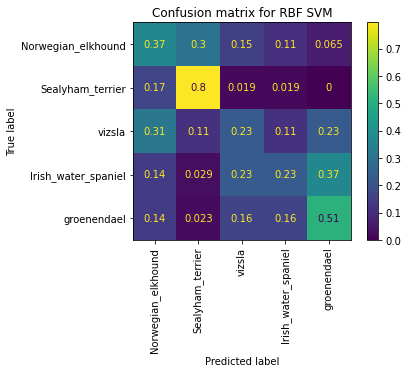

In [27]:

if(calcSVM):
    # Evaluate by means of a confusion matrix
    matrix = plot_confusion_matrix(svm, X_test_features, Y_test_features,
                                     normalize='true',
                                     display_labels= breed_list
                                     )
    plt.title('Confusion matrix for RBF SVM')
    plt.xticks(rotation=90)
    
    plt.show(matrix)
    plt.show()


Decision boundary:


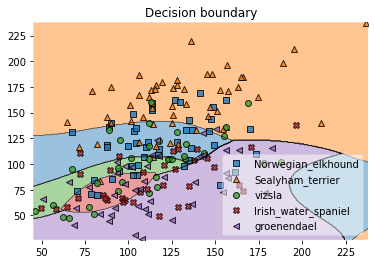

In [28]:

if(calcSVM):# Plot decision boundary
    print('Decision boundary:')
    ax = plot_decision_regions(np.array(X_test_features), np.array(Y_test_features), clf=svm, markers= "s^oX<")
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, 
              breed_list, 
              framealpha=0.5, 
              scatterpoints=1)
    
    plt.title('Decision boundary')
    plt.show()

Aufgabe 2:

In [29]:

if (calcCNN):
    #### Schuffel einschalten###
    label_array, data_array = utils.shuffle(label_array, data_array)
    
    # Einteilen der TEST und TRAIN Daten
    size_of_train= int(all_dogs*0.75)
    size_of_test = int(all_dogs*0.25)
    X_train = np.array(data_array[:size_of_train])
    Y_train = np.array(label_array[:size_of_train])
    
    X_test = np.array(data_array[-size_of_test:])
    Y_test = np.array(label_array[-size_of_test:])
    
    Y_train = Y_train.flatten()
    Y_test = Y_test.flatten()

In [30]:

if (calcCNN):
    input_shape = (SCALE, SCALE, 3)
    
    
    X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
    X_train=X_train / 255.0
    
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)
    X_test=X_test / 255.0
    
    
    Y_train = tf.one_hot(Y_train.astype(np.int32), depth=10)
    Y_test = tf.one_hot(Y_test.astype(np.int32), depth=10)
    

In [31]:

if (calcCNN):

    batch_size = 32
    num_classes = 10
    epochs = 20
    
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=X_train.shape[1:], activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Dropout(0.25),
    
        tf.keras.layers.Conv2D(64, 3, padding='same', input_shape=X_train.shape[1:], activation='relu'),
        #tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Dropout(0.25),
    
    
        tf.keras.layers.Conv2D(128, 3, padding='same', input_shape=X_train.shape[1:],  activation='relu'),
        #tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Dropout(0.25),
    
    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax'),
    
    ])
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy', metrics=['acc'])

In [32]:


if (calcCNN):
    #history = model.fit(X_train, Y_train, batch_size=batch_size,
    #                epochs=epochs)
    print(X_train.shape)
    print(Y_train.shape)
    history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              #shuffle=False,
              verbose=1)
              #validation_data=(X_test, Y_test))

(639, 32, 32, 3)
(639, 10)
Epoch 1/20
20/20 [==============================] - 1s 21ms/step - loss: 1.8230 - acc: 0.2175
Epoch 2/20
20/20 [==============================] - 0s 21ms/step - loss: 1.6825 - acc: 0.1925
Epoch 3/20
20/20 [==============================] - 0s 19ms/step - loss: 1.6482 - acc: 0.1925
Epoch 4/20
20/20 [==============================] - 1s 26ms/step - loss: 1.6361 - acc: 0.2034
Epoch 5/20
20/20 [==============================] - 0s 21ms/step - loss: 1.6219 - acc: 0.2551
Epoch 6/20
20/20 [==============================] - 0s 21ms/step - loss: 1.6203 - acc: 0.2269
Epoch 7/20
20/20 [==============================] - 0s 21ms/step - loss: 1.6088 - acc: 0.2598
Epoch 8/20
20/20 [==============================] - 0s 19ms/step - loss: 1.5947 - acc: 0.2551
Epoch 9/20
20/20 [==============================] - 1s 28ms/step - loss: 1.5952 - acc: 0.2770
Epoch 10/20
20/20 [==============================] - 0s 22ms/step - loss: 1.5811 - acc: 0.2817
Epoch 11/20
20/20 [=============

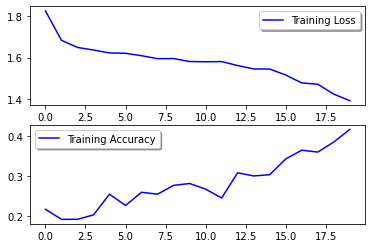

In [33]:

if (calcCNN):
    fig, ax = plt.subplots(2,1)
    ax[0].plot(history.history['loss'], color='b', label="Training Loss")
    legend = ax[0].legend(loc='best', shadow=True)
    ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
    legend = ax[1].legend(loc='best', shadow=True)

In [34]:

if (calcCNN):
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

Test loss: 1.7066187858581543
Test accuracy: 0.21596243977546692


In [35]:
#
#scores = cross_val_score(model, X_test, Y_test, cv=3, scoring='accuracy')
#print('\nCross-Validation-Score 3-fold')
#print(scores)
#

Confusion Matrix
 X-Achse = Predicted Labeles Y-Achse = die wahren Labels 


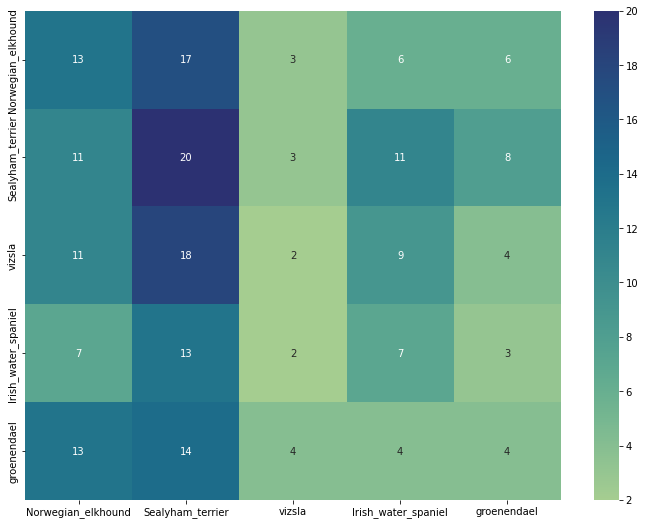

In [36]:

if (calcCNN):

    # Predict the values from the validation dataset
    y_pred = model.predict(X_test, verbose=0)
    
    # Convert predictions classes to one hot vectors 
    y_pred_classes = np.argmax(y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    
    y_true = np.argmax(Y_test,axis = 1)
    # compute the confusion matrix
    confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)
    
    plt.figure(figsize=(12, 9))
    
    c = sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap="crest")
    c.set(xticklabels=breed_list, yticklabels=breed_list)

